<a href="https://colab.research.google.com/github/pawel0508/CenyEnergiiElektrycznej/blob/main/Ward_Korelcje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

In [19]:
df_makro_raw = pd.read_csv('dane_makro.csv', sep =';')
makro = df_makro_raw.copy()
# print(makro.info())
# print(makro.iloc[:,2:].head())
makro = makro.iloc[:,2:]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
makro_std = scaler.fit_transform(makro)

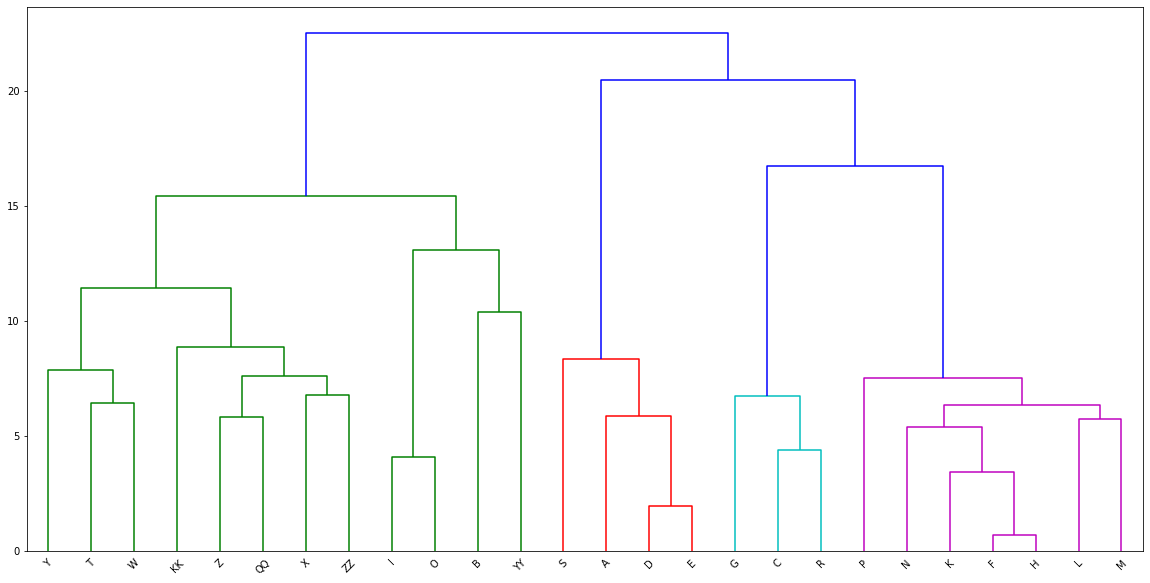

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline 
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(makro_std.T) #define the linkage_matrix using ward clustering pre-computed distances
plt.figure(figsize = (20, 10))
ax = dendrogram(linkage_matrix, orientation="top",labels=makro.columns);

In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
predict = cluster.fit_predict(makro_std.T)

In [64]:
zmienne_etykiety = pd.DataFrame({'Zmienna' : makro.columns, 'Etykieta' : predict})

In [65]:
makro_opisy = pd.read_csv('Zmienna_opis_makro.csv', sep =';')


In [66]:
makro_opisy.head()

,Zmienna,Opis
0,A,Przeciętne zatrudnienie w sektorze przedsiębio...
1,B,Bezrobotni zarejestrowani (stan w końcu okresu)
2,C,Przeciętne miesięczne realne wynagrodzenie bru...
3,D,Przeciętna miesięczna nominalna emerytura i re...
4,E,Przeciętna miesięczna nominalna emerytura i re...


In [129]:
etykiety = pd.merge(zmienne_etykiety, makro_opisy, 'left').sort_values(by = 'Etykieta')

In [130]:
korelacje = pd.read_csv('korelacje_makro_indeks_basic.csv', sep =',')

In [136]:
korelacje.columns = ['Zmienna', 'Korelacja_TGeBase']

In [137]:
korelacje = korelacje[korelacje.Zmienna != 'wolumen ']

In [148]:
tabela = pd.merge(etykiety, korelacje, 'left').sort_values(by = ['Etykieta', 'Korelacja_TGeBase'])

In [192]:
tabela = tabela.reset_index().drop(columns = 'index')
tabela.to_csv('TGeBase_etykiety_makro_korelacja.csv')

In [193]:
zmienne = tabela[abs(tabela.Korelacja_TGeBase) > 0.1].Zmienna


In [194]:
makro.corr().loc[zmienne, zmienne]

,B,YY,Z,QQ,S,E,D,A,F,M,O,I,Y,T,W
B,1.000000,0.051485,-0.040604,0.009829,-0.576722,-0.649436,-0.771105,-0.929370,0.021809,-0.021901,-0.128353,-0.177215,-0.360269,-0.662608,-0.480852
YY,0.051485,1.000000,0.050441,0.132833,0.009958,-0.194931,-0.144525,-0.021672,0.092025,0.027821,0.109288,0.100964,0.053661,0.152452,0.257592
Z,-0.040604,0.050441,1.000000,0.701644,-0.185572,-0.410083,-0.376510,-0.064906,-0.026052,-0.061124,0.235533,0.181264,0.405174,0.312427,0.524692
QQ,0.009829,0.132833,0.701644,1.000000,-0.360019,-0.411617,-0.328462,0.005190,-0.023459,-0.075201,-0.048568,-0.092617,0.432227,0.389019,0.482846
S,-0.576722,0.009958,-0.185572,-0.360019,1.000000,0.517858,0.561826,0.529953,-0.002857,0.050760,0.456188,0.536111,-0.135722,0.263597,0.138506
E,-0.649436,-0.194931,-0.410083,-0.411617,0.517858,1.000000,0.966641,0.710398,0.021617,0.108808,-0.049652,-0.103268,-0.044747,0.083602,0.003651
D,-0.771105,-0.144525,-0.376510,-0.328462,0.561826,0.966641,1.000000,0.821505,0.054407,0.122307,-0.033564,-0.048008,0.027882,0.252013,0.101360
A,-0.929370,-0.021672,-0.064906,0.005190,0.529953,0.710398,0.821505,1.000000,0.014087,0.009555,0.026495,0.049550,0.359464,0.643800,0.450946
F,0.021809,0.092025,-0.026052,-0.023459,-0.002857,0.021617,0.054407,0.014087,1.000000,0.832153,0.362384,0.172473,0.031299,0.004677,0.010915
M,-0.021901,0.027821,-0.061124,-0.075201,0.050760,0.108808,0.122307,0.009555,0.832153,1.000000,0.308660,0.181247,0.005264,-0.088031,0.039266


In [211]:
tabela.iloc[zmienne.index]

#tabela

,Zmienna,Etykieta,Opis,Korelacja_TGeBase
0,B,0,Bezrobotni zarejestrowani (stan w końcu okresu),-0.541197
1,YY,0,działalność finansowa i ubezpieczeniowa,0.146763
5,Z,1,"handel; naprawa pojazdów samochodowych∆,l",0.107559
6,QQ,1,zakwaterowanie i gastronomia∆,0.133921
7,S,2,Mieszkania oddane do użytkowania,0.326339
8,E,2,Przeciętna miesięczna nominalna emerytura i re...,0.335772
9,D,2,Przeciętna miesięczna nominalna emerytura i re...,0.442157
10,A,2,Przeciętne zatrudnienie w sektorze przedsiębio...,0.533285
19,F,4,"Produkcja sprzedana przemysłu ogółema,e,f (cen...",0.102926
20,M,4,dobra konsumpcyjne trwałe,0.138595
